In [1]:
from astropy import constants as cons
from astropy import units as un
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 50000
import matplotlib.pyplot as plt
import sys
plt.rcParams.update({'font.size': 20})

In [2]:
x, y, z, vx, vy, vz, m, d, u = np.genfromtxt('Renzo/out0110.sph.ascii', usecols= (0,1,2,3,4,5,6,7,8), unpack=True)

In [3]:
G = ((cons.G)/((un.R_sun.to(un.m)**3))*(un.M_sun.to(un.kg))*((1.8845e-2*86400)**2)).value

In [4]:
Mt = np.sum(m)

In [5]:
#xcm = np.sum(x*m) / Mt
#ycm = np.sum(y*m) / Mt
#zcm = np.sum(z*m) / Mt

xcm = x[np.argmax(d)]
ycm = y[np.argmax(d)]
zcm = z[np.argmax(d)]

print('The coords of the cm are: x = '+str(xcm)+'; y = '+str(ycm)+' and z = '+str(zcm))

The coords of the cm are: x = -0.3151272471113336; y = 0.1424565201554149 and z = -0.167839023627844


In [6]:
#vcmx = np.sum(vx*m) / Mt
#vcmy = np.sum(vy*m) / Mt
#vcmz = np.sum(vz*m) / Mt

vcmx = vx[np.argmax(d)]
vcmy = vy[np.argmax(d)]
vcmz = vz[np.argmax(d)]

print('The coords of the vcm are: vx = '+str(vcmx)+'; vy = '+str(vcmy)+' and vz = '+str(vcmz))

The coords of the vcm are: vx = -0.6685270877337568; vy = 0.03801029402228825 and vz = 0.09217173137531051


In [7]:
r = np.sqrt(x**2 + y**2 + z**2)
v = np.sqrt(vx**2 + vy**2 + vz**2)

In [8]:
rcm = np.sqrt((x-xcm)**2 + (y-ycm)**2 + (z-zcm)**2)
vcm = np.sqrt((vx-vcmx)**2 + (vy-vcmy)**2 + (vz-vcmz)**2)

In [9]:
index = np.argsort(rcm)

In [10]:
X = x[index]
Y = y[index]
Z = z[index]

R = rcm[index]
V = vcm[index]

U = u[index]
M = m[index]

In [11]:
Mencl = np.cumsum(M)

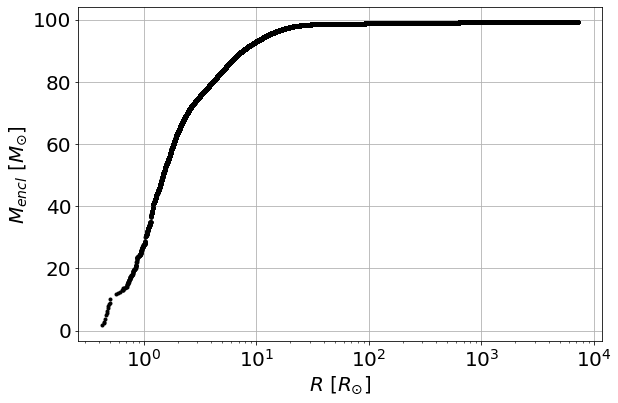

In [12]:
fig = plt.figure(figsize=(9, 6))

plt.plot(R,Mencl,'.k')
plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$M_{encl}$ [$M_{\odot}$]")
plt.semilogx()
plt.grid()

plt.tight_layout()
plt.show()

In [13]:
E = V**2 + U - G*Mencl/R

/tmp/ipykernel_8185/615990575.py:1: RuntimeWarning: divide by zero encountered in true_divide
  E = V**2 + U - G*Mencl/R


In [20]:
#K = []
#for i in range(len(M)):
    #suma = 0
    #for j in range(len(M)):
        #if i != j:
            #suma += G*(M[i]*M[j])/np.linalg.norm(np.array([X,Y,Z])[:,i]-np.array([X,Y,Z])[:,j]) 
        #else:
            #pass
    #K.append(suma)

In [15]:
K

[118.19857901071533,
 29.156340828758843,
 35.57180988854671,
 34.64717617882464,
 62.840079470965506,
 118.05853083711787,
 49.98371797690837,
 50.593131958052815,
 63.040858904288974,
 59.635002657069485]

In [16]:
np.savetxt('Potential.txt', K)

/tmp/ipykernel_8185/1660189785.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(R,G*Mencl/R,'.k')


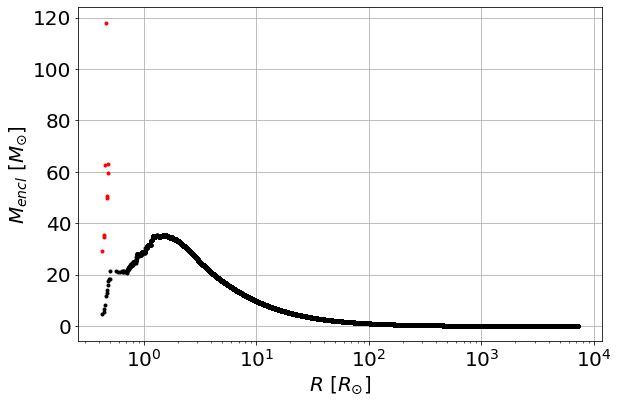

In [19]:
fig = plt.figure(figsize=(9, 6))

plt.plot(R,G*Mencl/R,'.k')
plt.plot(R[0:10],K,'.r')
plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$M_{encl}$ [$M_{\odot}$]")
plt.semilogx()
plt.grid()

plt.tight_layout()
plt.show()

In [16]:
M

array([1.48178069e+00, 3.91979359e-01, 4.67423801e-01, ...,
       1.13014103e-10, 1.13014103e-10, 1.13014103e-10])

In [17]:
V**2

array([0.00000000e+00, 3.70980405e-01, 2.44892725e-01, ...,
       4.78502080e+02, 4.72288722e+02, 4.72536318e+02])

In [18]:
U

array([4.01336663e+01, 2.80011948e+01, 2.90473740e+01, ...,
       4.00022052e-02, 3.98041008e-02, 3.98408067e-02])

In [19]:
inner_R = np.where(np.cumsum(E[1:]) < 0)[0][0]

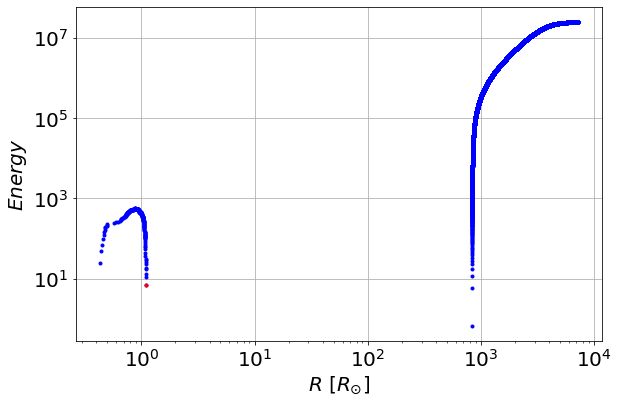

In [20]:
fig = plt.figure(figsize=(9, 6))

plt.plot(R[1:],np.cumsum(E[1:]),'.b')
plt.plot(R[inner_R-1],np.cumsum(E[1:])[inner_R-1],'.r')

plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$Energy$")
plt.semilogx()
plt.semilogy()
plt.grid()

plt.tight_layout()
plt.show()

In [21]:
unb = np.where(E[inner_R:] > 0)[0] + inner_R

In [22]:
bun_fin = np.where(E[inner_R:] <= 0)[0] + inner_R
bun_ini = np.where(R < R[inner_R])[0]
bun = np.concatenate((bun_ini,bun_fin))

In [23]:
percent = np.sum(M[unb])*100/Mt
percent

7.007662367731564

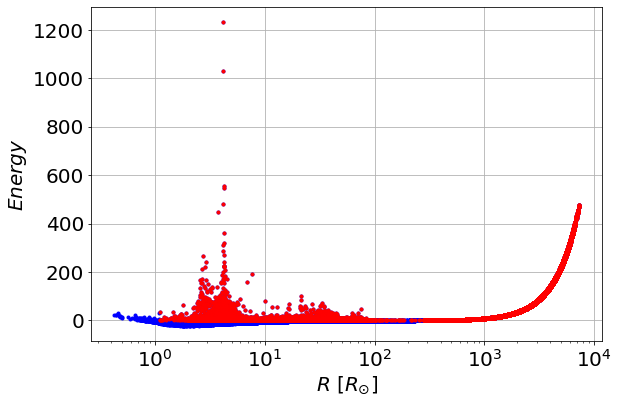

In [24]:
fig = plt.figure(figsize=(9, 6))

plt.plot(R,E,'.b')
plt.plot(R[unb],E[unb],'.r')

plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$Energy$")
plt.semilogx()
plt.grid()

plt.tight_layout()
plt.show()

In [25]:
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_R.txt', R)
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_Menc.txt', Menc)
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_R_un.txt', R[unb])
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_Menc_un.txt', M[unb])
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_R_bn.txt', R[bun])
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_Menc_bn.txt', M[bun])

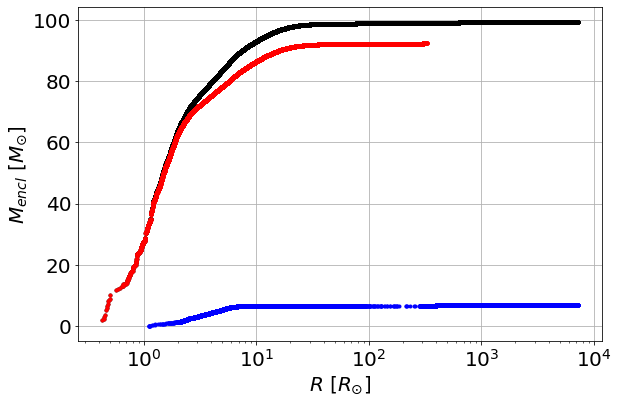

In [26]:
fig = plt.figure(figsize=(9, 6))

plt.plot(R,Mencl,'.k')
plt.plot(R[bun],np.cumsum(M[bun]),'.r')
plt.plot(R[unb],np.cumsum(M[unb]),'.b')


plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$M_{encl}$ [$M_{\odot}$]")
plt.semilogx()
plt.grid()

plt.tight_layout()
plt.show()

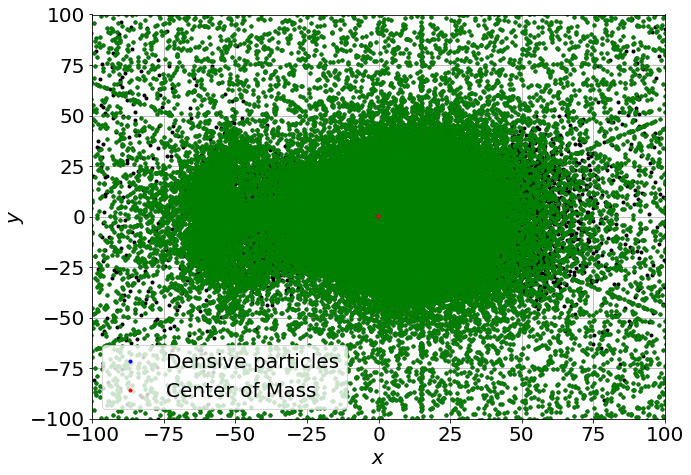

In [27]:
fig = plt.figure(figsize=(10, 7))

plt.plot(x,y,'.k')
plt.plot(x[unb],y[unb],'.g')
#plt.plot(x[np.argmax(m)],y[np.argmax(m)],'.g', label = 'Massive particles')
plt.plot(x[np.argmax(d)],y[np.argmax(d)],'.b', label = 'Densive particles')
plt.plot(xcm,ycm,'.r', label='Center of Mass')


plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
per, out = np.genfromtxt('Renzo/Munb_percent.txt', usecols= (0,1), unpack=True)
perE, outE = np.genfromtxt('Renzo/New_E/Munb_percent.txt', usecols= (0,1), unpack=True)

In [29]:
time = np.linspace(0,0.5*1.8445e-02*len(per),len(per))
timeE = np.linspace(0,0.5*1.8445e-02*len(perE),len(perE))

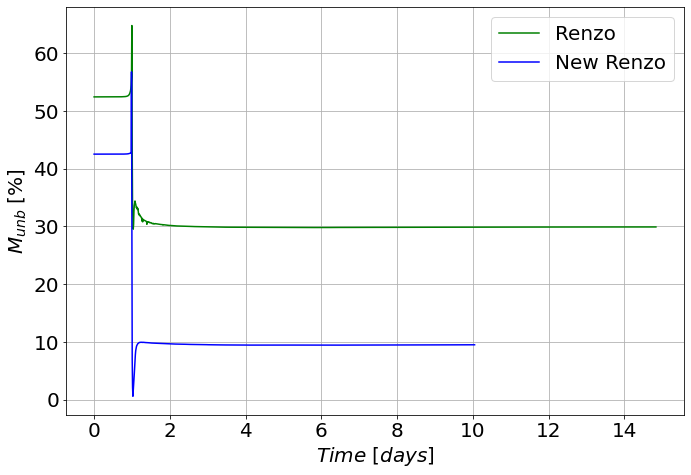

In [30]:
fig = plt.figure(figsize=(10, 7))

plt.plot(time,per,'-g', label = 'Renzo')
plt.plot(timeE,perE,'-b', label = 'New Renzo')

plt.xlabel("$Time$ $[days]$")
plt.ylabel("$M_{unb}$ $[\%]$")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()